In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('job_cleaned_data.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Same_State,Python_Req,Matlab_Req,R_Req,Sas_Req,Sql_Req,Spark_Req,Aws_Req,Excel_Req,Hadoop_Req
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,1,1,0,1,0,0,0,1,0
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,1,0,0,0,0,0,0,0,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,1,0,0,1,1,1,0,1,0
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,1,0,0,0,0,0,0,0,0
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,1,0,0,1,1,0,0,1,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Per_Hour', 'Employer_Provided', 'Min_Salary', 'Max_Salary',
       'Average_Salary', 'Company_Name_Txt', 'Years_of_Company',
       'Location_States', 'Same_State', 'Python_Req', 'Matlab_Req', 'R_Req',
       'Sas_Req', 'Sql_Req', 'Spark_Req', 'Aws_Req', 'Excel_Req',
       'Hadoop_Req'],
      dtype='object')

In [5]:
#job roles 
def get_titles(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data analyst' in title.lower() or 'analyst' in title.lower():
        return 'analyst'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning' in title.lower():
        return 'machine learning eng'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'none'
#level of the job     
def level(title):
    if 'senior' in title.lower() or 'sr'in title.lower() or 'sr.'in title.lower() or 'principal' in title.lower() or 'lead' in title.lower():
        return 'senior'
    elif 'junior' in title.lower() or 'jr'in title.lower()or 'jr.'in title.lower():
        return 'junior'
    else:
        return 'none'

In [6]:
df['Job_Roles'] = df['Job Title'].apply(get_titles)
df.Job_Roles.value_counts()
#df.columns

Job_Roles
data scientist          279
none                    183
data engineer           118
analyst                 103
manager                  22
machine learning eng     22
director                 14
Name: count, dtype: int64

In [7]:
df['Job_levels'] = df['Job Title'].apply(level)
df.Job_levels.value_counts()
#df.head(10)

Job_levels
none      518
senior    220
junior      3
Name: count, dtype: int64

In [8]:
#df.Location_States.value_counts()
df['Location_States'] = df['Location_States'].apply(lambda x : x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.Location_States.value_counts()

Location_States
CA    152
MA    102
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: count, dtype: int64

In [9]:
df['Desc_Len'] = df['Job Description'].apply(lambda x: len(x))
df['Desc_Len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
736    6162
737    6130
738    3078
739    1642
740    3673
Name: Desc_Len, Length: 741, dtype: int64

In [10]:
df['Num_Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1'  else 0 )
df['Num_Competitors']

0      0
1      0
2      0
3      3
4      3
      ..
736    3
737    3
738    0
739    0
740    0
Name: Num_Competitors, Length: 741, dtype: int64

In [11]:
df['Min_Salary'] = df.apply(lambda x : x.Min_Salary*2 if x.Per_Hour == 1 else x.Min_Salary, axis=1)
df['Max_Salary'] = df.apply(lambda x : x.Max_Salary*2 if x.Per_Hour == 1 else x.Max_Salary, axis=1)


In [12]:
df['Average_Salary'] = df.apply(lambda x: (x['Min_Salary'] + x['Max_Salary']) / 2 if x['Per_Hour'] == 1 else x['Average_Salary'], axis=1)

In [13]:
#df[df.Per_Hour == 1][['Per_Hour' , 'Min_Salary' , 'Max_Salary']]
df[df.Per_Hour == 1][['Per_Hour' , 'Min_Salary' , 'Max_Salary','Average_Salary']]

,Per_Hour,Min_Salary,Max_Salary,Average_Salary
165,1,34,48,41.0
177,1,42,68,55.0
197,1,36,50,43.0
202,1,42,68,55.0
210,1,30,50,40.0
246,1,34,48,41.0
271,1,42,68,55.0
337,1,36,50,43.0
345,1,48,78,63.0
357,1,42,68,55.0


In [14]:
df['Company_Name_Txt'] = df['Company_Name_Txt'].apply(lambda x : x.replace('\n', ''))
df['Company_Name_Txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
736                                      GSK
737                               Eventbrite
738           Software Engineering Institute
739                             Numeric, LLC
740             Riverside Research Institute
Name: Company_Name_Txt, Length: 741, dtype: object

In [15]:
df.describe()

,Rating,Founded,Per_Hour,Employer_Provided,Min_Salary,Max_Salary,Average_Salary,Years_of_Company,Same_State,Python_Req,Matlab_Req,R_Req,Sas_Req,Sql_Req,Spark_Req,Aws_Req,Excel_Req,Hadoop_Req,Desc_Len,Num_Competitors
count,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000
mean,3.625101,1839.635628,0.032389,0.021592,74.685560,128.140351,101.412955,50.391363,0.558704,0.529015,0.074224,0.049933,0.117409,0.512821,0.225371,0.237517,0.522267,0.167341,3870.129555,1.055331
std,0.783541,492.903246,0.177150,0.145447,30.987568,45.250167,37.566835,54.029978,0.496877,0.499495,0.262312,0.217953,0.322124,0.500173,0.418109,0.425849,0.499841,0.373533,1522.440414,1.384632
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.000000,124.000000,97.500000,28.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,63.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,280.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


<Axes: >

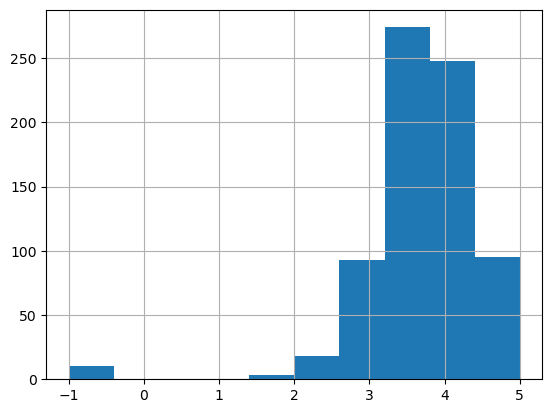

In [16]:
df.Rating.hist()

<Axes: >

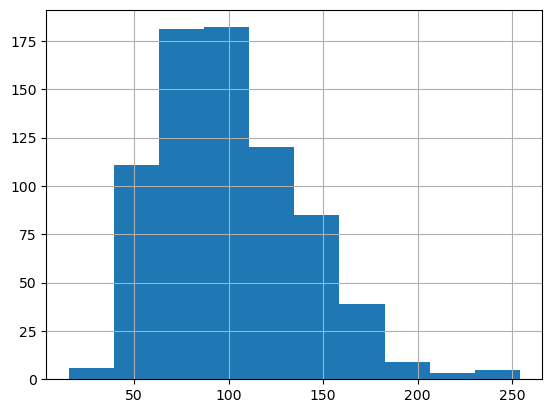

In [17]:
df.Average_Salary.hist()

<Axes: >

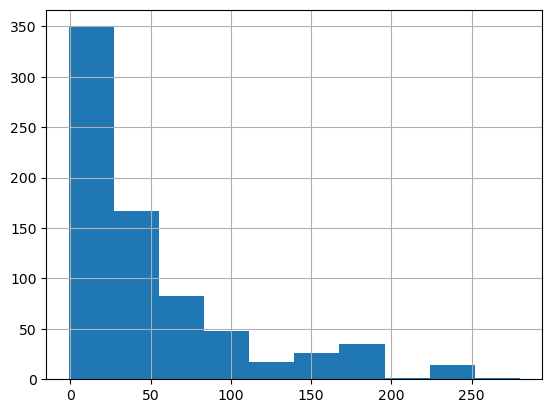

In [18]:
df.Years_of_Company.hist()

<Axes: >

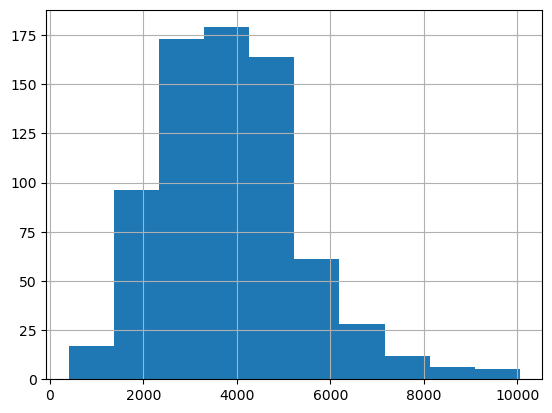

In [19]:
df.Desc_Len.hist()

<Axes: >

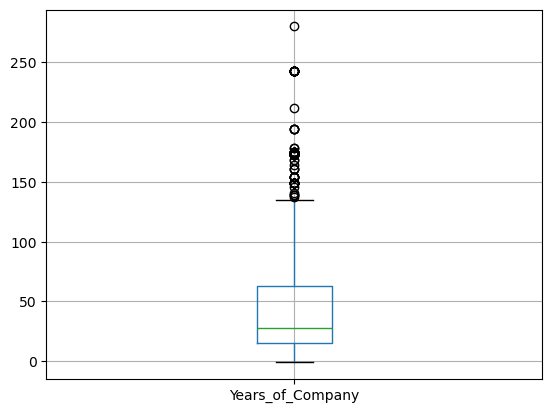

In [20]:
df.boxplot(column = 'Years_of_Company')

<Axes: >

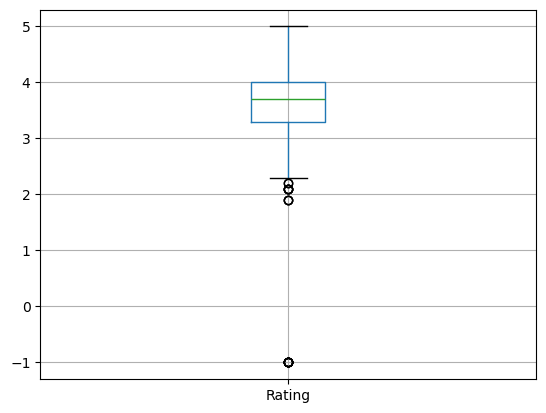

In [21]:
df.boxplot(column = 'Rating')

<Axes: >

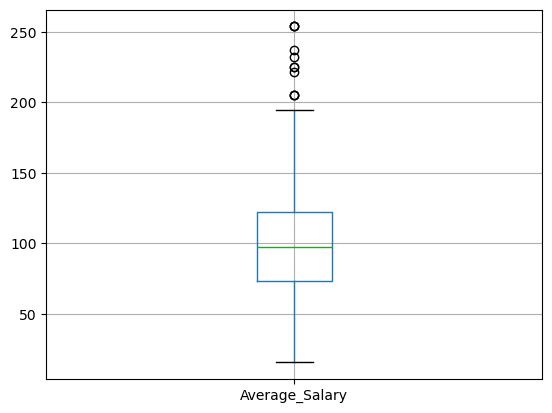

In [22]:
df.boxplot(column = 'Average_Salary')

<Axes: >

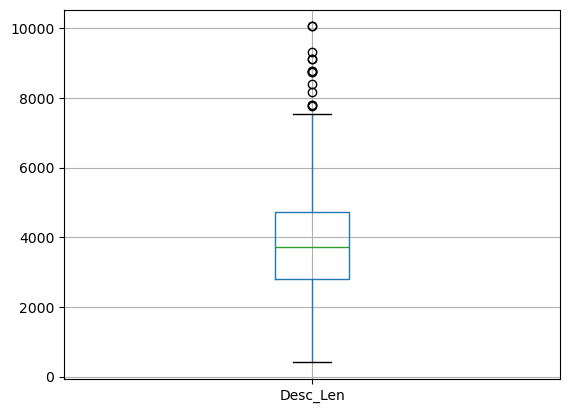

In [23]:
df.boxplot(column = 'Desc_Len')

In [24]:
df[['Years_of_Company','Average_Salary','Rating', 'Desc_Len','Num_Competitors']].corr()

,Years_of_Company,Average_Salary,Rating,Desc_Len,Num_Competitors
Years_of_Company,1.000000,0.022323,0.020743,0.164740,0.128990
Average_Salary,0.022323,1.000000,0.016221,0.070651,0.083746
Rating,0.020743,0.016221,1.000000,-0.014833,0.021761
Desc_Len,0.164740,0.070651,-0.014833,1.000000,0.104374
Num_Competitors,0.128990,0.083746,0.021761,0.104374,1.000000


<Axes: >

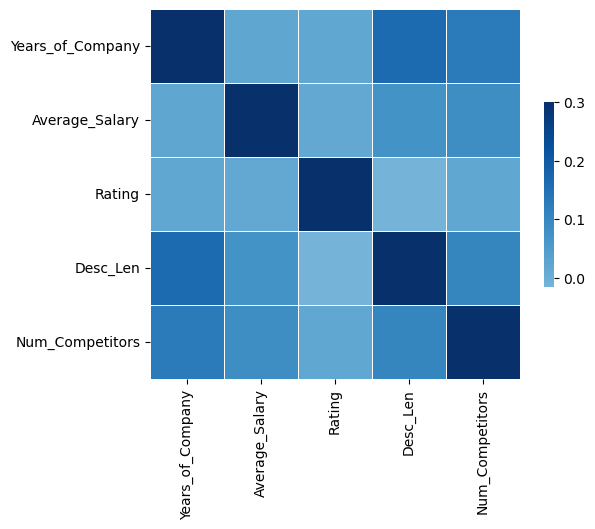

In [25]:
cmap =sns.color_palette("Blues", as_cmap=True)
    
sns.heatmap(df[['Years_of_Company','Average_Salary','Rating', 'Desc_Len','Num_Competitors']].corr(),cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},)

In [26]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Per_Hour', 'Employer_Provided', 'Min_Salary', 'Max_Salary',
       'Average_Salary', 'Company_Name_Txt', 'Years_of_Company',
       'Location_States', 'Same_State', 'Python_Req', 'Matlab_Req', 'R_Req',
       'Sas_Req', 'Sql_Req', 'Spark_Req', 'Aws_Req', 'Excel_Req', 'Hadoop_Req',
       'Job_Roles', 'Job_levels', 'Desc_Len', 'Num_Competitors'],
      dtype='object')

In [27]:
df_category = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company_Name_Txt','Same_State', 'Python_Req', 'Matlab_Req', 'R_Req',
       'Sas_Req', 'Sql_Req', 'Spark_Req', 'Aws_Req', 'Excel_Req', 'Hadoop_Req','Job_Roles', 'Job_levels']]

Graph is of Location With total 200


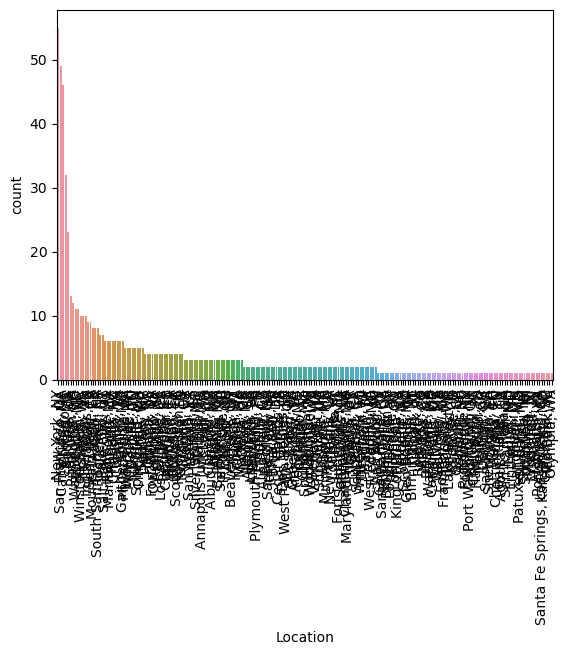

Graph is of Headquarters With total 197


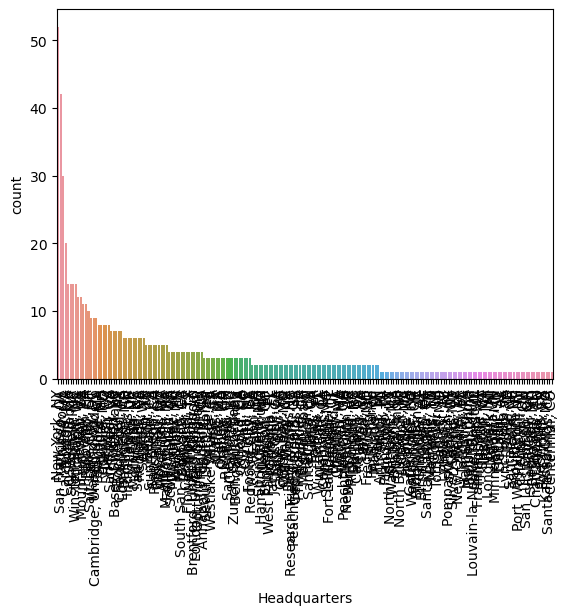

Graph is of Size With total 8


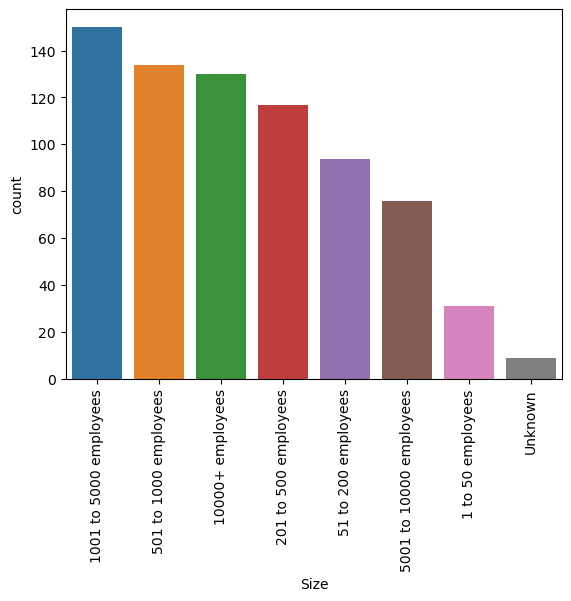

Graph is of Type of ownership With total 10


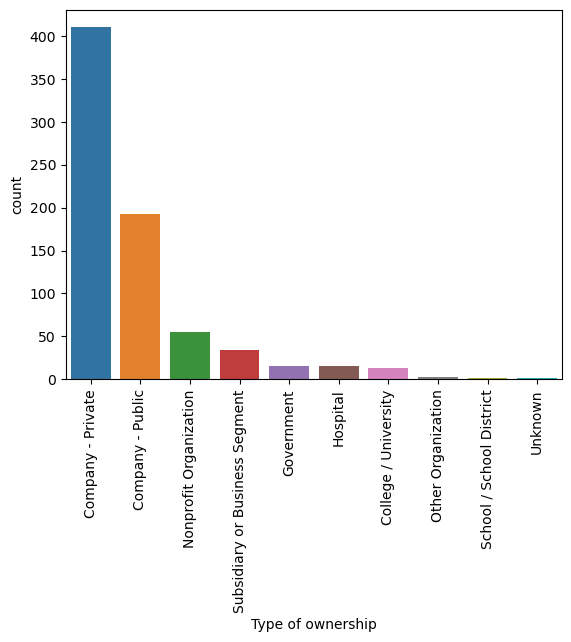

Graph is of Industry With total 60


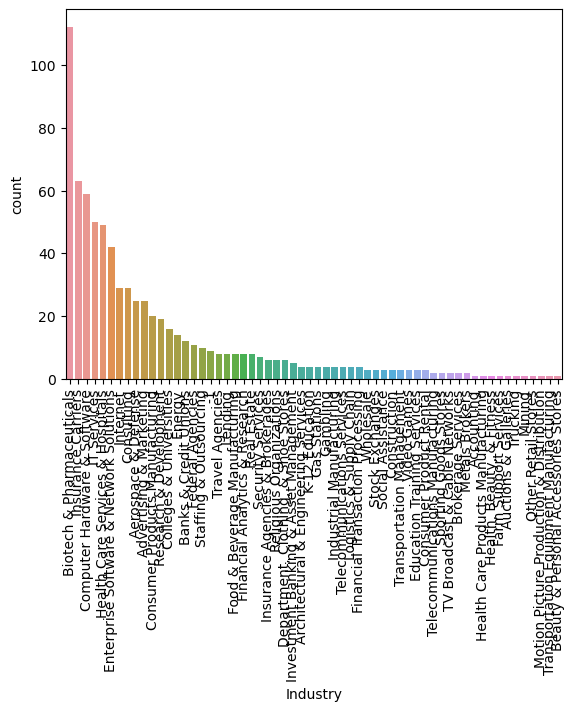

Graph is of Sector With total 25


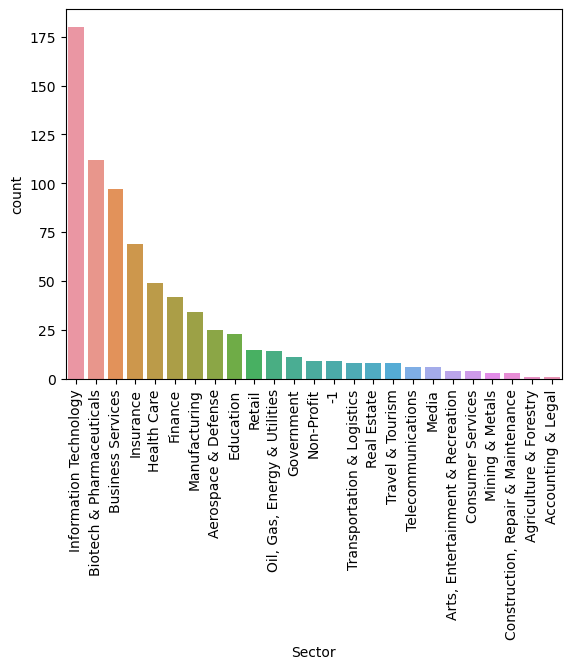

Graph is of Revenue With total 13


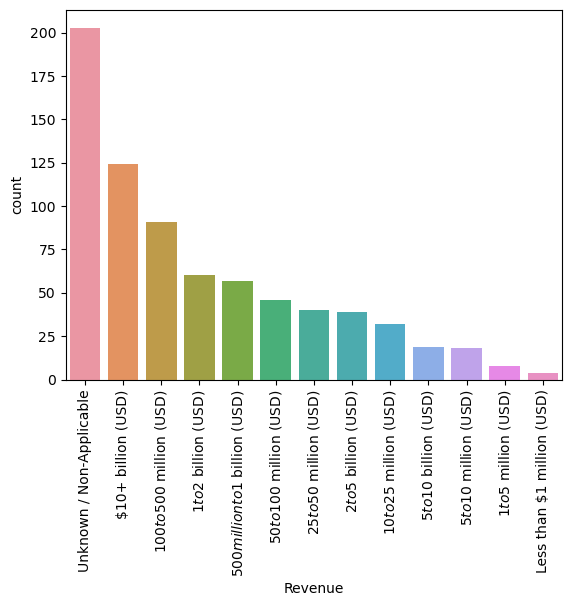

Graph is of Company_Name_Txt With total 342


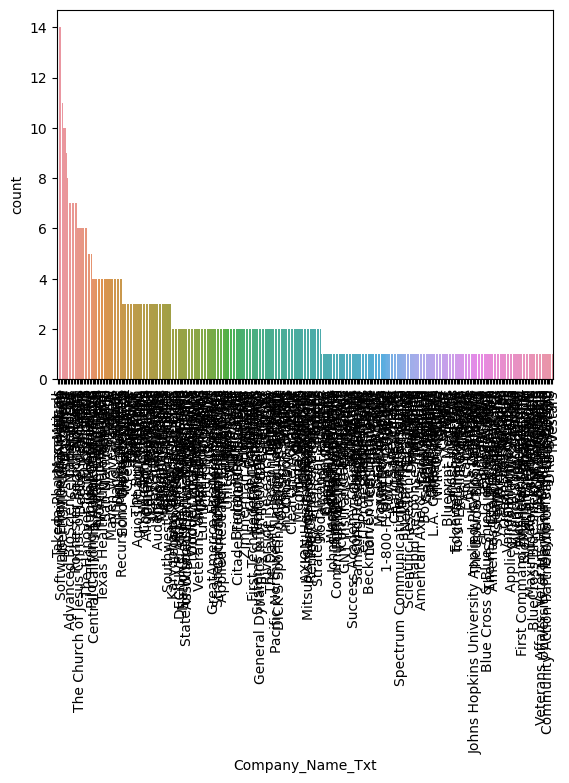

Graph is of Same_State With total 2


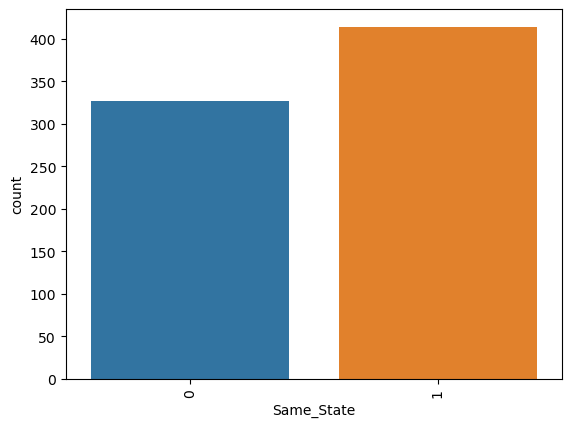

Graph is of Python_Req With total 2


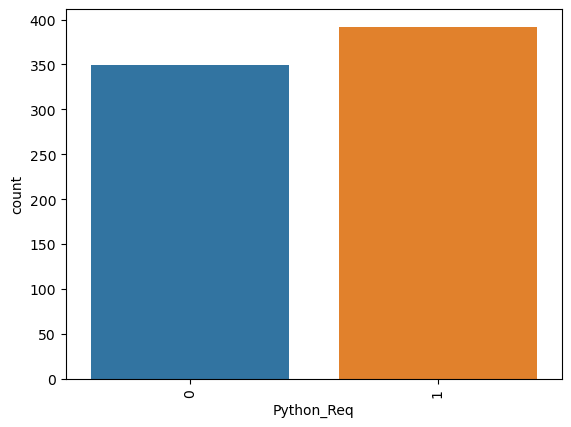

Graph is of Matlab_Req With total 2


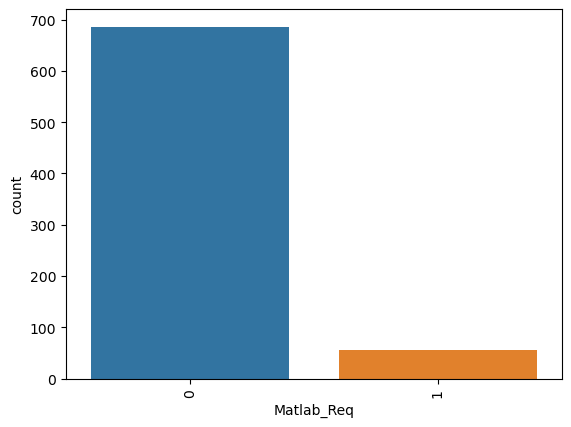

Graph is of R_Req With total 2


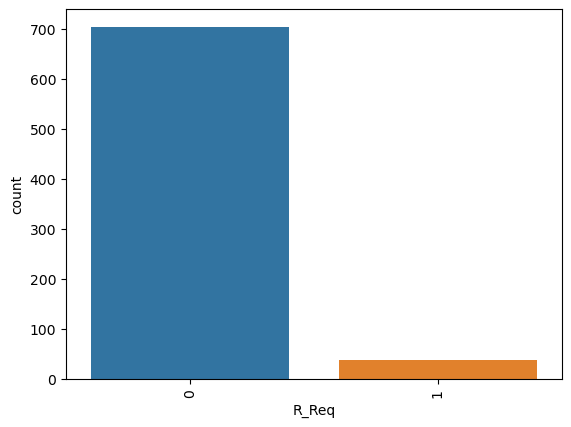

Graph is of Sas_Req With total 2


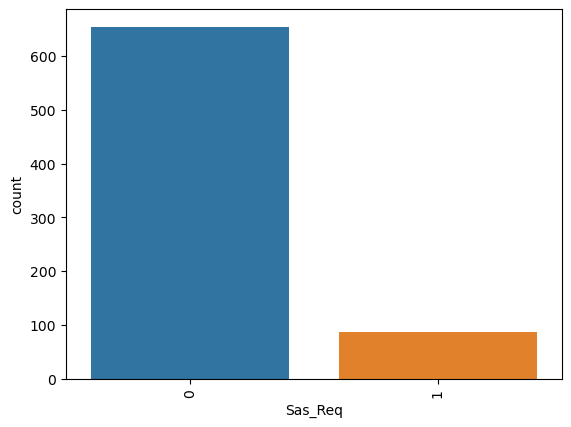

Graph is of Sql_Req With total 2


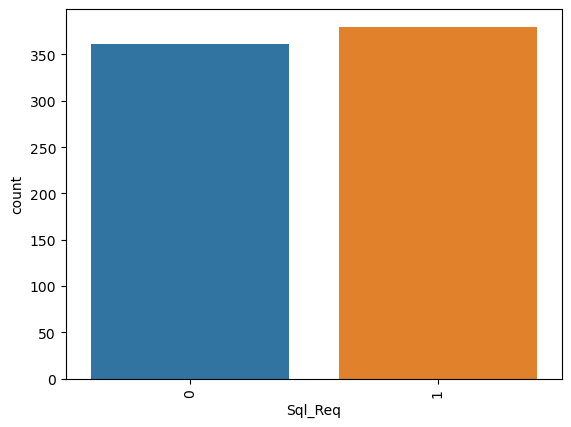

Graph is of Spark_Req With total 2


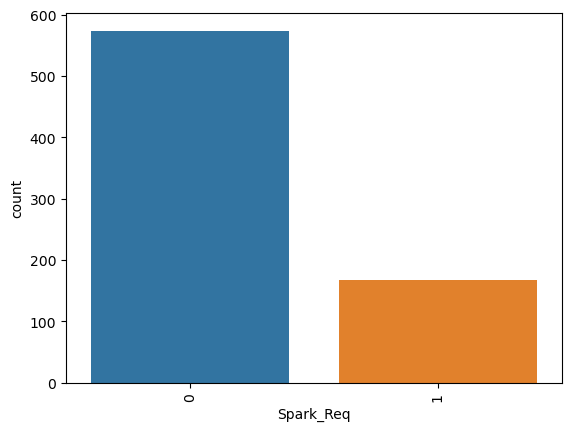

Graph is of Aws_Req With total 2


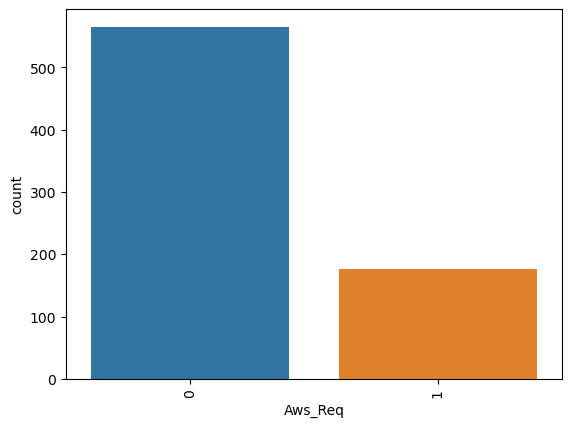

Graph is of Excel_Req With total 2


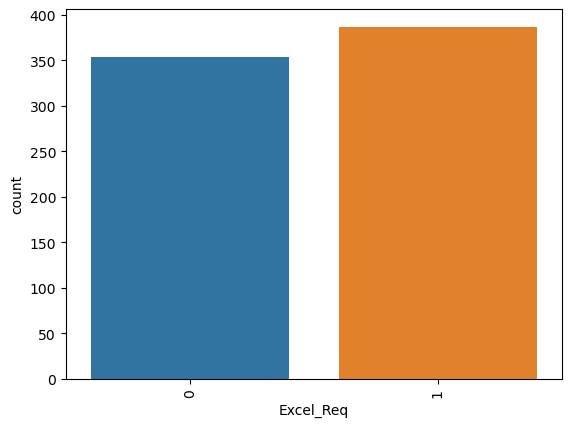

Graph is of Hadoop_Req With total 2


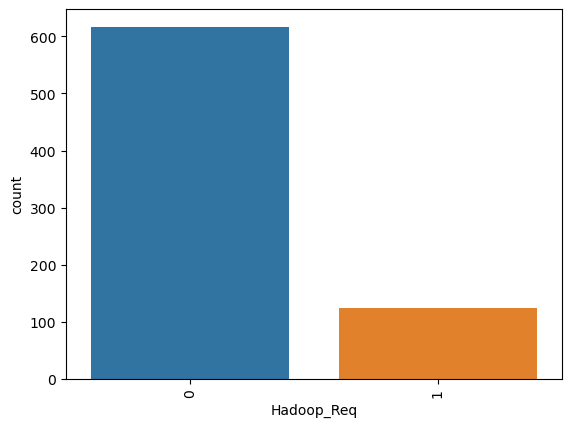

Graph is of Job_Roles With total 7


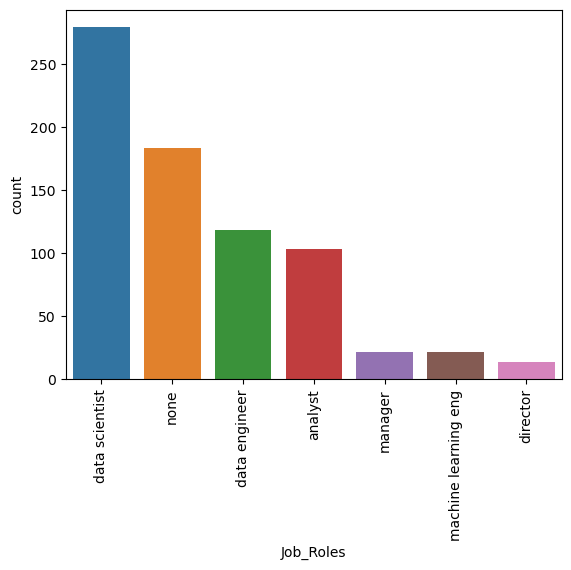

Graph is of Job_levels With total 3


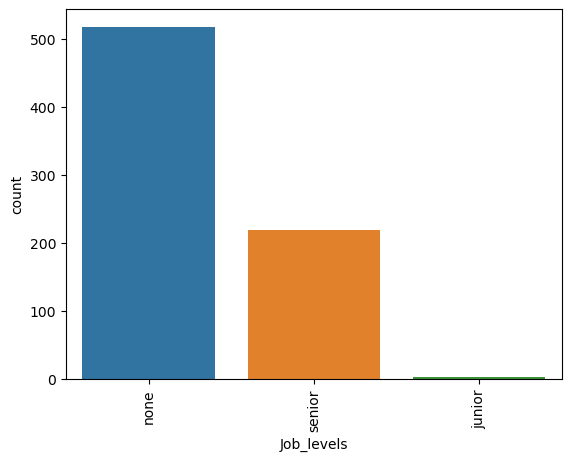

In [28]:
for i in df_category.columns:
    category_num = df_category[i].value_counts()
    print("Graph is of " + i + " With total " + str(len(category_num)))
    chart = sns.barplot(x=category_num.index, y=category_num)
    chart.set_xticklabels (chart.get_xticklabels (), rotation=90)
    plt.show()
    

Top 20 : Graph is of Location With total 20


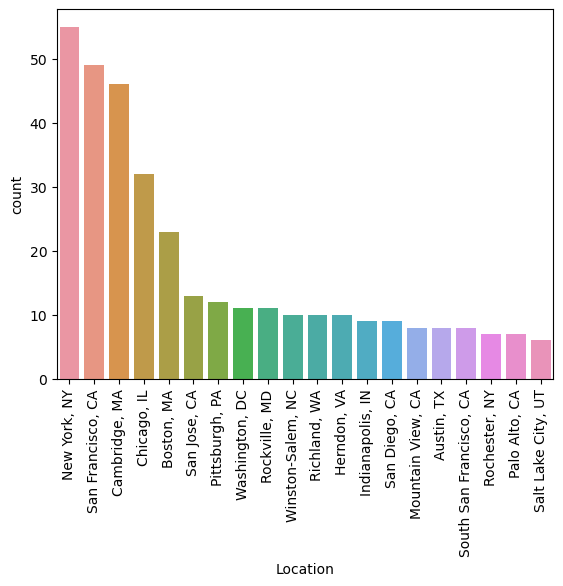

Top 20 : Graph is of Headquarters With total 20


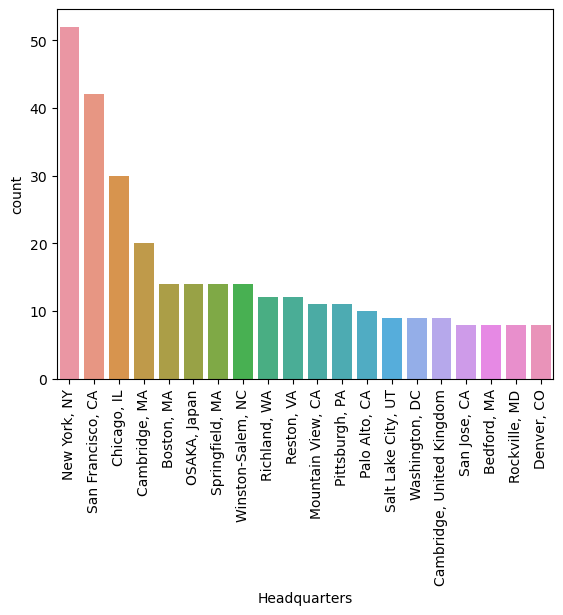

Top 20 : Graph is of Company_Name_Txt With total 20


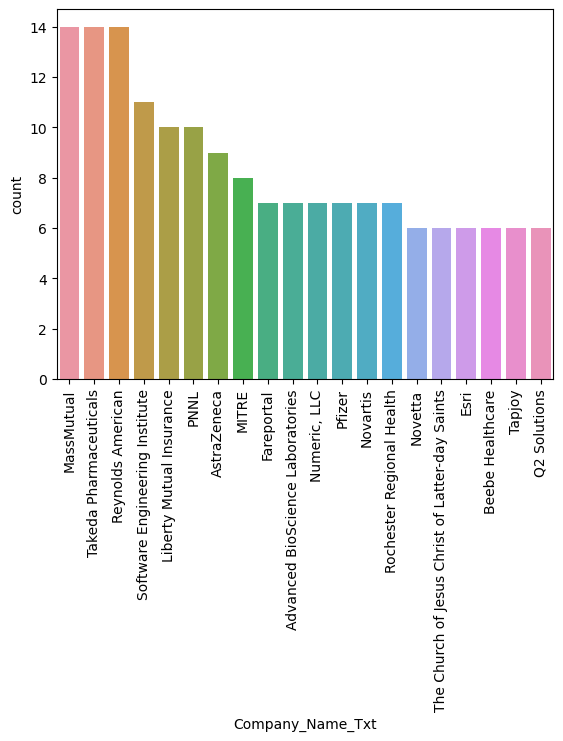

In [29]:
for i in df_category[['Location','Headquarters','Company_Name_Txt']]:
    category_num = df_category[i].value_counts()[:20]
    print("Top 20 : Graph is of " + i + " With total " + str(len(category_num)))
    chart = sns.barplot(x=category_num.index, y=category_num)
    chart.set_xticklabels (chart.get_xticklabels (), rotation=90)
    plt.show()
    

In [30]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Per_Hour', 'Employer_Provided', 'Min_Salary', 'Max_Salary',
       'Average_Salary', 'Company_Name_Txt', 'Years_of_Company',
       'Location_States', 'Same_State', 'Python_Req', 'Matlab_Req', 'R_Req',
       'Sas_Req', 'Sql_Req', 'Spark_Req', 'Aws_Req', 'Excel_Req', 'Hadoop_Req',
       'Job_Roles', 'Job_levels', 'Desc_Len', 'Num_Competitors'],
      dtype='object')

                      Average_Salary
Job_Roles                           
analyst                    66.048544
data engineer             105.800847
data scientist            117.564516
director                  168.607143
machine learning eng      126.431818
manager                    84.022727
none                       87.806011


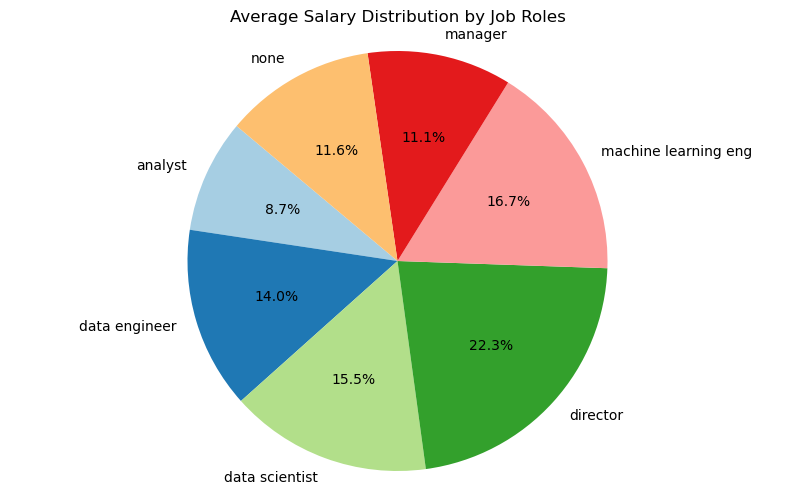

In [31]:
Jr_As_pivot = pd.pivot_table(df,index = ['Job_Roles'] , values = 'Average_Salary')
print(Jr_As_pivot)
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired.colors  
labels = Jr_As_pivot.index
sizes = Jr_As_pivot['Average_Salary']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Average Salary Distribution by Job Roles')
plt.show()

                                 Average_Salary
Job_Roles            Job_levels                
analyst              junior           53.250000
                     none             61.270270
                     senior           80.092593
data engineer        none             97.172840
                     senior          124.689189
data scientist       junior          106.500000
                     none            107.043011
                     senior          138.956522
director             none            168.607143
machine learning eng none            119.133333
                     senior          142.071429
manager              none             84.022727
none                 none             78.190476
                     senior          109.061404


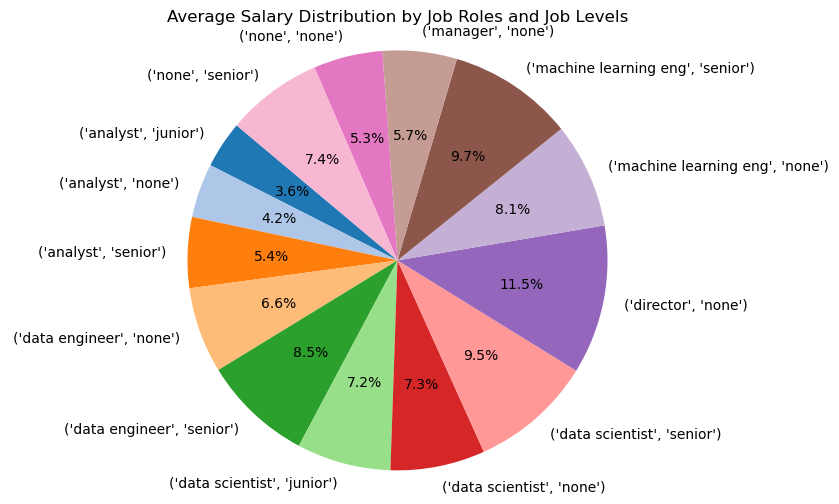

In [32]:
Jr_Jl_As_pivot = pd.pivot_table(df,index = ['Job_Roles','Job_levels'] , values = 'Average_Salary')
print(Jr_Jl_As_pivot)
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20.colors  
labels = Jr_Jl_As_pivot.index
sizes = Jr_Jl_As_pivot['Average_Salary']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Average Salary Distribution by Job Roles and Job Levels')
plt.show()

                 Average_Salary
Location_States                
CA                   123.513158
IL                   116.662500
DC                   110.181818
MA                   107.313725
NJ                   104.558824
MI                   100.250000
RI                   100.000000
NY                    98.652778
NC                    98.452381
MD                    97.357143
KY                    97.000000
VA                    95.621951
UT                    94.150000
PA                    93.803030
WA                    93.190476
TX                    92.464286
OR                    92.125000
IN                    90.300000
TN                    89.192308
OH                    87.571429
KS                    87.000000
AZ                    85.666667
CO                    85.636364
MN                    85.500000
MO                    84.722222
GA                    80.666667
IA                    78.900000
FL                    77.625000
NM                    74.333333
WI      

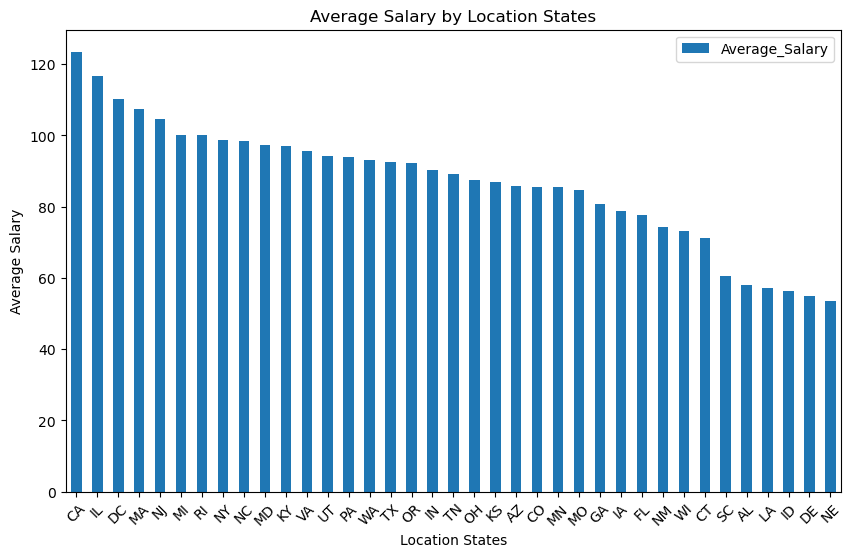

In [33]:
Ls_As_pivot =pd.pivot_table(df,index ='Location_States' , values = 'Average_Salary').sort_values('Average_Salary', ascending = False)
print(Ls_As_pivot)
Ls_As_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Average Salary by Location States')
plt.xlabel('Location States')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

In [34]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Per_Hour', 'Employer_Provided', 'Min_Salary', 'Max_Salary',
       'Average_Salary', 'Company_Name_Txt', 'Years_of_Company',
       'Location_States', 'Same_State', 'Python_Req', 'Matlab_Req', 'R_Req',
       'Sas_Req', 'Sql_Req', 'Spark_Req', 'Aws_Req', 'Excel_Req', 'Hadoop_Req',
       'Job_Roles', 'Job_levels', 'Desc_Len', 'Num_Competitors'],
      dtype='object')

        Average_Salary
Rating                
-1.0        138.050000
 5.0        134.700000
 2.5        120.000000
 4.5        117.714286
 4.1        116.368421
 3.9        113.071429
 2.6        109.083333
 4.4        108.606061
 4.0        107.170213
 3.2        106.928571
 3.7        105.680328
 3.5        104.897959
 4.7        103.983871
 3.3        103.897436
 4.3        102.468750
 4.2        100.442308
 2.2         97.750000
 3.8         97.418033
 4.6         97.250000
 2.1         95.900000
 3.4         93.465909
 3.6         89.945652
 1.9         87.500000
 3.1         86.580000
 3.0         85.588235
 2.7         85.178571
 2.8         83.928571
 2.3         81.500000
 2.9         81.138889
 4.8         80.277778
 2.4         60.214286


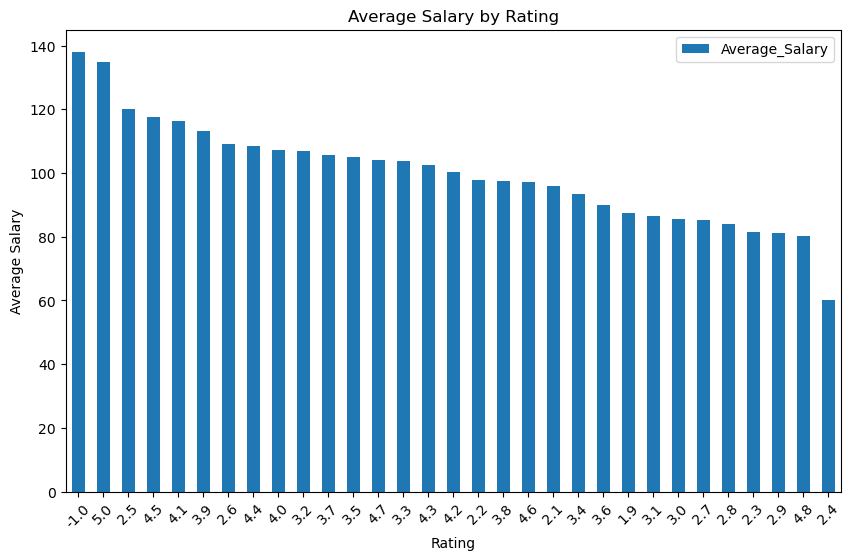

In [35]:
Rat_As_pivot =pd.pivot_table(df,index ='Rating',  values = 'Average_Salary').sort_values('Average_Salary', ascending = False)
print(Rat_As_pivot)
Rat_As_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Average Salary by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

                                          Average_Salary
Industry                                                
Other Retail Stores                           163.500000
Motion Picture Production & Distribution      146.000000
Financial Analytics & Research                145.125000
Health, Beauty, & Fitness                     139.500000
Telecommunications Services                   131.500000
Brokerage Services                            129.000000
Auctions & Galleries                          128.000000
Internet                                      123.810345
Investment Banking & Asset Management         118.400000
TV Broadcast & Cable Networks                 117.750000
Enterprise Software & Network Solutions       115.369048
Computer Hardware & Software                  115.194915
-1                                            114.333333
Accounting                                    113.500000
Biotech & Pharmaceuticals                     112.098214
Insurance Agencies & Brokerages

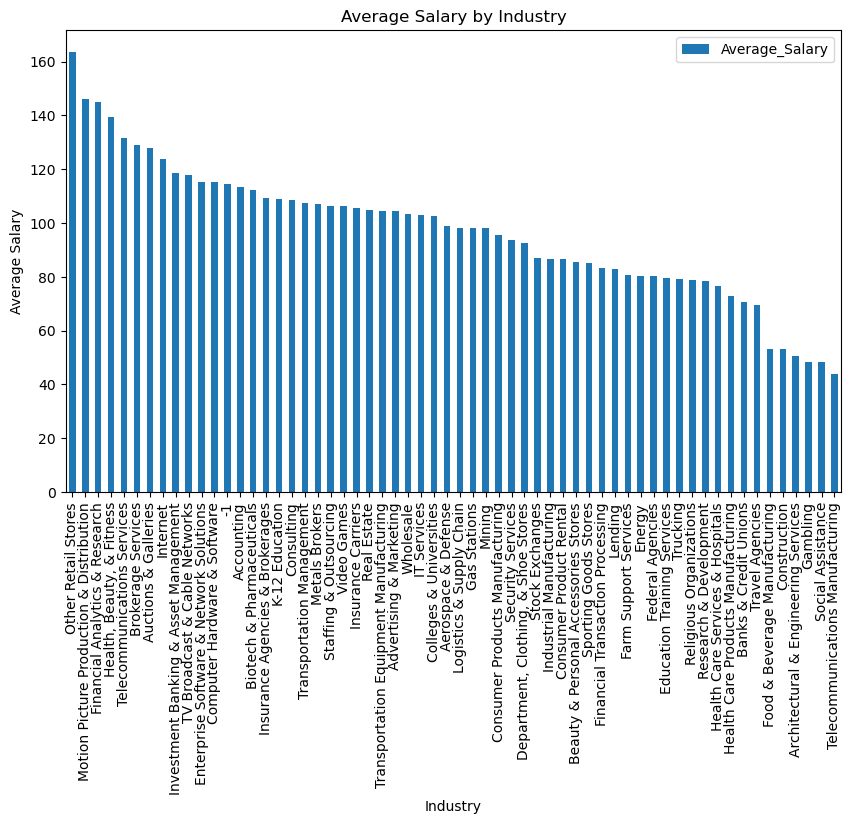

In [36]:
In_As_pivot =pd.pivot_table(df,index ='Industry',   values = 'Average_Salary').sort_values('Average_Salary', ascending = False)
print(In_As_pivot)
#In_As_pivot_top15 = In_As_pivot.head(15)
In_As_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Average Salary by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()

                                    Average_Salary
Sector                                            
Media                                   116.666667
-1                                      114.333333
Accounting & Legal                      113.500000
Information Technology                  113.191667
Biotech & Pharmaceuticals               112.098214
Insurance                               105.942029
Real Estate                             104.750000
Mining & Metals                         104.000000
Telecommunications                      102.333333
Education                               100.739130
Consumer Services                        99.875000
Retail                                   99.666667
Transportation & Logistics               99.312500
Aerospace & Defense                      99.060000
Finance                                  98.011905
Business Services                        97.701031
Manufacturing                            84.044118
Agriculture & Forestry         

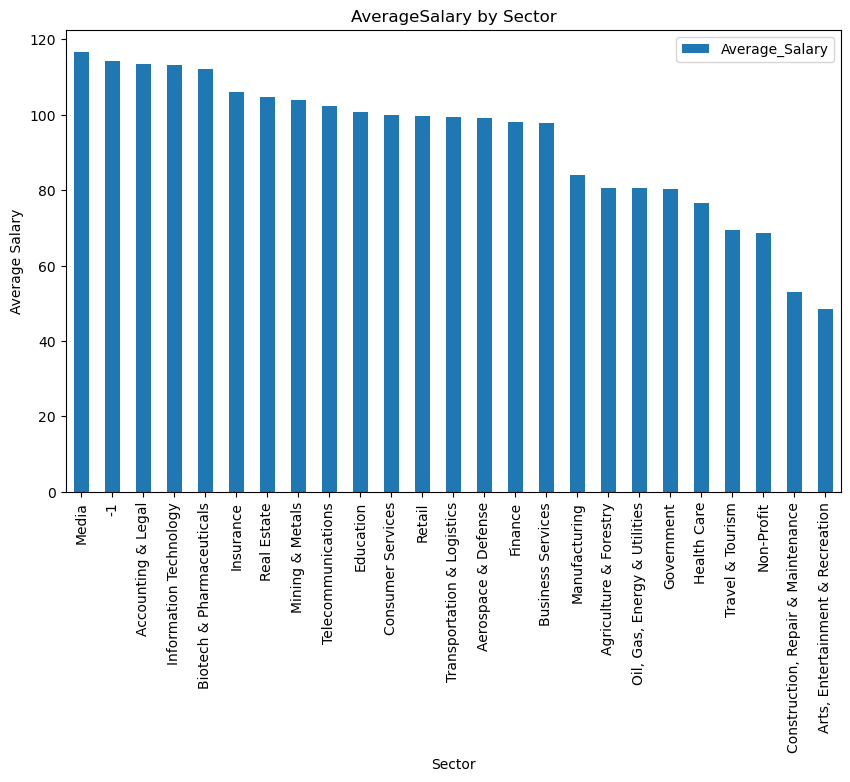

In [37]:
Se_As_pivot =pd.pivot_table(df,index ='Sector',values = 'Average_Salary').sort_values('Average_Salary', ascending = False)
print(Se_As_pivot)
Se_As_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('AverageSalary by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()

                                  Average_Salary
Revenue                                         
$5 to $10 million (USD)               126.111111
$1 to $5 million (USD)                119.312500
$10+ billion (USD)                    115.568548
Less than $1 million (USD)            108.625000
Unknown / Non-Applicable              105.002463
$1 to $2 billion (USD)                104.533333
$50 to $100 million (USD)             102.434783
$10 to $25 million (USD)              101.515625
$2 to $5 billion (USD)                 95.423077
$5 to $10 billion (USD)                94.184211
$500 million to $1 billion (USD)       86.991228
$100 to $500 million (USD)             86.005495
$25 to $50 million (USD)               82.837500


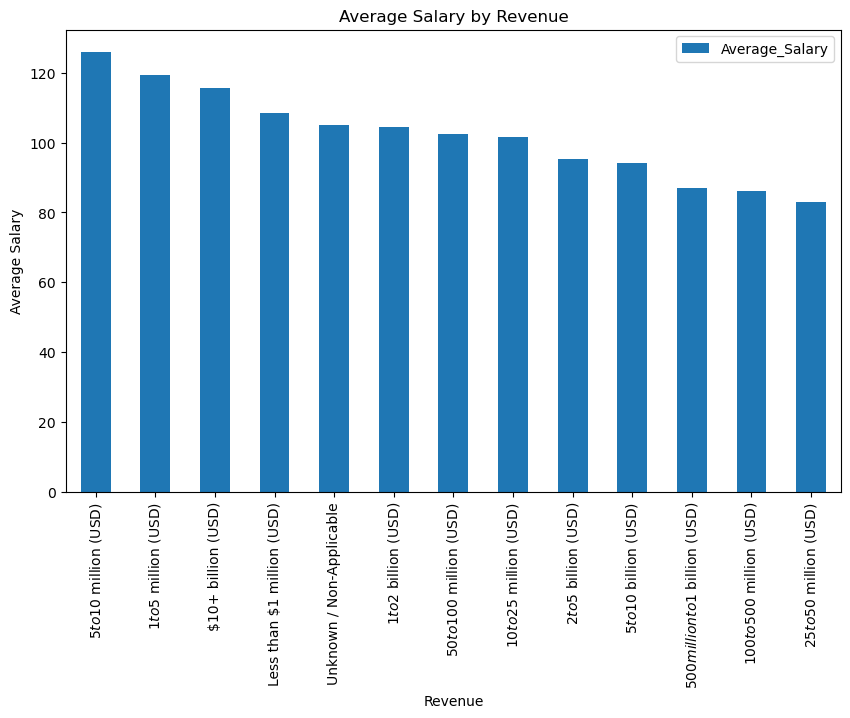

In [38]:
Rev_As_pivot =pd.pivot_table(df,index ='Revenue',   values = 'Average_Salary').sort_values('Average_Salary', ascending = False)
print(Rev_As_pivot)
Rev_As_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Average Salary by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()

In [39]:
df_pivots = df[['Num_Competitors', 'Per_Hour','Employer_Provided','Python_Req', 'Matlab_Req', 'R_Req', 'Sas_Req', 'Sql_Req', 'Spark_Req', 'Aws_Req', 'Excel_Req', 'Hadoop_Req', 'Type of ownership','Average_Salary']]

In [40]:
for i in df_pivots.columns[:-1]:
    print("Table is of: " + i + ":\n")
    print(pd.pivot_table(df_pivots,index =i, values = 'Average_Salary').sort_values('Average_Salary', ascending = False))
    print('\n')

Table is of: Num_Competitors:

                 Average_Salary
Num_Competitors                
2                    108.085366
1                    106.208333
3                    105.504386
0                     98.757081
4                     56.500000


Table is of: Per_Hour:

          Average_Salary
Per_Hour                
0             103.133891
1              50.000000


Table is of: Employer_Provided:

                   Average_Salary
Employer_Provided                
1                      125.093750
0                      100.890345


Table is of: Python_Req:

            Average_Salary
Python_Req                
1               112.653061
0                88.787966


Table is of: Matlab_Req:

            Average_Salary
Matlab_Req                
1               118.436364
0               100.048105


Table is of: R_Req:

       Average_Salary
R_Req                
0          101.533381
1           99.121622


Table is of: Sas_Req:

         Average_Salary
Sas_Req         

In [36]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'Python_Req', values = 'Average_Salary', aggfunc = 'count')

Python_Req,0,1
Revenue,,
$1 to $2 billion (USD),16,44
$1 to $5 million (USD),1,7
$10 to $25 million (USD),16,16
$10+ billion (USD),66,58
$100 to $500 million (USD),47,44
$2 to $5 billion (USD),17,22
$25 to $50 million (USD),24,16
$5 to $10 billion (USD),9,10
$5 to $10 million (USD),9,9


In [138]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Per_Hour', 'Employer_Provided', 'Min_Salary', 'Max_Salary',
       'Average_Salary', 'Company_Name_Txt', 'Years_of_Company',
       'Location_States', 'Same_State', 'Python_Req', 'Matlab_Req', 'R_Req',
       'Sas_Req', 'Sql_Req', 'Spark_Req', 'Aws_Req', 'Excel_Req', 'Hadoop_Req',
       'Job_Roles', 'Job_levels', 'Desc_Len', 'Num_Competitors'],
      dtype='object')

In [139]:
df_result = df.copy()
df_result.to_csv('eda.csv', index= False)